<a href="https://colab.research.google.com/github/bomul0417/study/blob/main/NIDS_Project/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import sklearn
import sys
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df_url = 'https://github.com/bomul0417/study/blob/main/NIDS_Project/nsl-kdd/dos_test.csv?raw=true'

In [9]:
df = pd.read_csv(df_url)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,19,9,491,0,0,0,0,2,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,2,40,9,146,0,0,0,0,13,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,1,44,5,0,0,0,0,0,123,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,1,22,9,232,8153,0,0,0,5,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,1,22,9,199,420,0,0,0,30,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130434,0,0,14,9,1032,0,0,0,0,53,...,255,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1
130435,0,1,49,9,794,333,0,0,0,1,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,0
130436,0,1,22,9,317,938,0,0,0,2,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0
130437,0,1,22,9,54540,8314,0,0,0,5,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,1


In [10]:
df.value_counts('label')

label
0    77054
1    53385
dtype: int64

In [11]:
land_url='/content/drive/Othercomputers/My Computer/dos(변환됨)/land.csv'
land = pd.read_csv(land_url)
land

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,udp,ntp_u,SF,90,90,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,udp,ntp_u,SF,90,90,0,0,0,1,...,1,1,0,0,0,0,0,0,0,1
2,0,udp,ntp_u,SF,90,90,0,0,0,2,...,2,1,0,0,0,0,0,0,0,1
3,90,icmp,eco_i,SF,50220,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
pod_url='/content/drive/Othercomputers/My Computer/dos(변환됨)/pod.csv'
pod = pd.read_csv(pod_url)
pod

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http_443,RSTO,2721,6827,0,0,0,0,...,0,0,0,0.00,0,0,0,0,0,1
1,0,udp,domain_u,SF,81,97,0,0,0,0,...,0,0,0,0.00,0,0,0,0,0,1
2,0,icmp,eco_i,SF,1514,0,0,0,0,0,...,0,0,0,0.00,0,0,0,0,0,1
3,0,icmp,ecr_i,SF,1514,0,0,0,0,0,...,0,0,0,0.00,0,0,0,0,0,1
4,0,icmp,ecr_i,SF,1514,0,0,0,0,0,...,1,0,0,0.50,1,0,0,0,0,1
5,0,icmp,ecr_i,SF,1514,0,0,0,0,0,...,2,0,0,0.67,1,0,0,0,0,1
6,0,icmp,eco_i,SF,1514,0,0,0,0,1,...,1,1,0,0.50,0,0,0,0,0,1
7,0,icmp,eco_i,SF,1514,0,0,0,0,2,...,2,1,0,0.67,0,0,0,0,0,1
8,0,icmp,eco_i,SF,1514,0,0,0,0,3,...,3,1,0,0.75,0,0,0,0,0,1
9,0,icmp,eco_i,SF,1514,0,0,0,0,4,...,4,1,0,0.80,0,0,0,0,0,1


In [13]:
s_url='/content/drive/Othercomputers/My Computer/dos(변환됨)/syn.csv'
s = pd.read_csv(s_url)
s

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,RSTO,120,0,0,0,0,0,...,0,0,0,0,0,0.00,0.00,0,0,1
1,0,tcp,http,RSTO,120,0,0,0,0,1,...,1,1,0,0,0,0.00,0.00,0,0,1
2,0,tcp,http,RSTO,120,0,0,0,0,2,...,2,1,0,0,0,0.00,0.00,0,0,1
3,0,tcp,http,RSTO,120,0,0,0,0,3,...,3,1,0,0,0,0.00,0.00,0,0,1
4,0,tcp,http,S1,60,0,0,0,0,4,...,4,1,0,0,0,0.00,0.00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,0,tcp,http,S1,60,0,0,0,0,38,...,100,1,0,0,0,0.11,0.11,0,0,1
424,0,tcp,http,S1,60,0,0,0,0,39,...,100,1,0,0,0,0.12,0.12,0,0,1
425,0,tcp,http,RSTO,120,0,0,0,0,40,...,100,1,0,0,0,0.13,0.13,0,0,1
426,0,tcp,http,RSTO,120,0,0,0,0,41,...,100,1,0,0,0,0.13,0.13,0,0,1


In [14]:
u_url='/content/drive/Othercomputers/My Computer/dos(변환됨)/udp.csv'
u = pd.read_csv(u_url)
u

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,udp,other,SF,60,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,udp,other,SF,60,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,1
2,0,udp,other,SF,60,0,0,0,0,2,...,2,1,0,0,0,0,0,0,0,1
3,0,udp,other,SF,60,0,0,0,0,3,...,3,1,0,0,0,0,0,0,0,1
4,0,udp,other,SF,60,0,0,0,0,4,...,4,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,0,udp,other,SF,60,0,0,0,0,1014,...,100,1,0,0,0,0,0,0,0,1
1015,0,udp,other,SF,60,0,0,0,0,1015,...,100,1,0,0,0,0,0,0,0,1
1016,0,udp,other,SF,60,0,0,0,0,1016,...,100,1,0,0,0,0,0,0,0,1
1017,0,udp,other,SF,60,0,0,0,0,1017,...,100,1,0,0,0,0,0,0,0,1


In [15]:
d2_url='/content/drive/Othercomputers/My Computer/dos(변환됨)/d2.csv'
d2 = pd.read_csv(d2_url)
d2

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,udp,ntp_u,SF,90,90,0,0,0,0,...,0,0,0,0.0,0,0.00,0.00,0,0,1
1,0,udp,ntp_u,SF,90,90,0,0,0,1,...,1,1,0,0.0,0,0.00,0.00,0,0,1
2,0,udp,ntp_u,SF,90,90,0,0,0,2,...,2,1,0,0.0,0,0.00,0.00,0,0,1
3,90,icmp,eco_i,SF,50220,0,1,0,0,0,...,0,0,0,0.0,0,0.00,0.00,0,0,1
4,0,tcp,http_443,RSTO,2721,6827,0,0,0,0,...,0,0,0,0.0,0,0.00,0.00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,0,tcp,http,S1,60,0,0,0,0,38,...,100,1,0,0.0,0,0.11,0.11,0,0,1
1506,0,tcp,http,S1,60,0,0,0,0,39,...,100,1,0,0.0,0,0.12,0.12,0,0,1
1507,0,tcp,http,RSTO,120,0,0,0,0,40,...,100,1,0,0.0,0,0.13,0.13,0,0,1
1508,0,tcp,http,RSTO,120,0,0,0,0,41,...,100,1,0,0.0,0,0.13,0.13,0,0,1


In [16]:
for columns in d2.columns:
  if d2[columns].dtypes == 'object':
    print(columns, '\n종류:', d2[columns].unique(), '\n개수:', d2[columns].nunique(), '\n')

protocol_type 
종류: ['udp' 'icmp' 'tcp'] 
개수: 3 

service 
종류: ['ntp_u' 'eco_i' 'http_443' 'domain_u' 'ecr_i' 'other' 'http'] 
개수: 7 

flag 
종류: ['SF' 'RSTO' 'S1'] 
개수: 3 



In [17]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

le.fit(d2['protocol_type'])
protocol = le.transform(d2['protocol_type'])

le.fit(d2['service'])
service = le.transform(d2['service'])

le.fit(d2['flag'])
flag = le.transform(d2['flag'])

d2['protocol_type'] = protocol
d2['service'] = service
d2['flag'] = flag

In [18]:
d2

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,2,5,2,90,90,0,0,0,0,...,0,0,0,0.0,0,0.00,0.00,0,0,1
1,0,2,5,2,90,90,0,0,0,1,...,1,1,0,0.0,0,0.00,0.00,0,0,1
2,0,2,5,2,90,90,0,0,0,2,...,2,1,0,0.0,0,0.00,0.00,0,0,1
3,90,0,1,2,50220,0,1,0,0,0,...,0,0,0,0.0,0,0.00,0.00,0,0,1
4,0,1,4,0,2721,6827,0,0,0,0,...,0,0,0,0.0,0,0.00,0.00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,0,1,3,1,60,0,0,0,0,38,...,100,1,0,0.0,0,0.11,0.11,0,0,1
1506,0,1,3,1,60,0,0,0,0,39,...,100,1,0,0.0,0,0.12,0.12,0,0,1
1507,0,1,3,0,120,0,0,0,0,40,...,100,1,0,0.0,0,0.13,0.13,0,0,1
1508,0,1,3,0,120,0,0,0,0,41,...,100,1,0,0.0,0,0.13,0.13,0,0,1


In [19]:
dos = pd.concat([df,d2])
dos

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,19,9,491,0,0,0,0,2,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,2,40,9,146,0,0,0,0,13,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,1,44,5,0,0,0,0,0,123,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,1,22,9,232,8153,0,0,0,5,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,1,22,9,199,420,0,0,0,30,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,0,1,3,1,60,0,0,0,0,38,...,100,1.00,0.00,0.00,0.00,0.11,0.11,0.00,0.00,1
1506,0,1,3,1,60,0,0,0,0,39,...,100,1.00,0.00,0.00,0.00,0.12,0.12,0.00,0.00,1
1507,0,1,3,0,120,0,0,0,0,40,...,100,1.00,0.00,0.00,0.00,0.13,0.13,0.00,0.00,1
1508,0,1,3,0,120,0,0,0,0,41,...,100,1.00,0.00,0.00,0.00,0.13,0.13,0.00,0.00,1


In [20]:
dos.value_counts('label')

label
0    77054
1    54895
dtype: int64

In [21]:
df_X = dos.drop(columns=['label'])
df_Y = dos['label']
df_X

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,19,9,491,0,0,0,0,2,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,40,9,146,0,0,0,0,13,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,1,44,5,0,0,0,0,0,123,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,1,22,9,232,8153,0,0,0,5,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,1,22,9,199,420,0,0,0,30,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,0,1,3,1,60,0,0,0,0,38,...,100,100,1.00,0.00,0.00,0.00,0.11,0.11,0.00,0.00
1506,0,1,3,1,60,0,0,0,0,39,...,100,100,1.00,0.00,0.00,0.00,0.12,0.12,0.00,0.00
1507,0,1,3,0,120,0,0,0,0,40,...,100,100,1.00,0.00,0.00,0.00,0.13,0.13,0.00,0.00
1508,0,1,3,0,120,0,0,0,0,41,...,100,100,1.00,0.00,0.00,0.00,0.13,0.13,0.00,0.00


In [22]:
df_Y

0       0
1       0
2       1
3       0
4       0
       ..
1505    1
1506    1
1507    1
1508    1
1509    1
Name: label, Length: 131949, dtype: int64

In [23]:
from sklearn.preprocessing import MinMaxScaler

#pd.options.display.float_format = '{:.9f}'.format #지수표현 X
#pd.reset_option('display.float_format') 

scaler = sklearn.preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(df_X)

xle = pd.DataFrame(np_scaled, columns = df_X.columns)

xle

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,count,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.5,0.296875,0.9,5.481041e-06,0.00000,0.0,0.0,0.0,0.001965,...,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0.0,1.0,0.625000,0.9,1.629800e-06,0.00000,0.0,0.0,0.0,0.012770,...,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0.0,0.5,0.687500,0.5,0.000000e+00,0.00000,0.0,0.0,0.0,0.120825,...,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0.0,0.5,0.343750,0.9,2.589820e-06,0.00116,0.0,0.0,0.0,0.004912,...,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0.0,0.5,0.343750,0.9,2.221440e-06,0.00006,0.0,0.0,0.0,0.029470,...,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131944,0.0,0.5,0.046875,0.1,6.697810e-07,0.00000,0.0,0.0,0.0,0.037328,...,0.392157,0.392157,1.00,0.00,0.00,0.00,0.11,0.11,0.00,0.00
131945,0.0,0.5,0.046875,0.1,6.697810e-07,0.00000,0.0,0.0,0.0,0.038310,...,0.392157,0.392157,1.00,0.00,0.00,0.00,0.12,0.12,0.00,0.00
131946,0.0,0.5,0.046875,0.0,1.339562e-06,0.00000,0.0,0.0,0.0,0.039293,...,0.392157,0.392157,1.00,0.00,0.00,0.00,0.13,0.13,0.00,0.00
131947,0.0,0.5,0.046875,0.0,1.339562e-06,0.00000,0.0,0.0,0.0,0.040275,...,0.392157,0.392157,1.00,0.00,0.00,0.00,0.13,0.13,0.00,0.00


In [24]:
from sklearn.model_selection import train_test_split

X, X_test, Y, Y_test = train_test_split(xle, df_Y, test_size=0.2, random_state=2022)

print(X.shape, Y.shape)
print(X_test.shape, Y_test.shape)

(105559, 28) (105559,)
(26390, 28) (26390,)


In [25]:
X2, X_val, Y2, Y_val = train_test_split(X, Y)
print(X2.shape, Y2.shape)
print(X_val.shape, Y_val.shape)

(79169, 28) (79169,)
(26390, 28) (26390,)


In [26]:
X_train = X.values
X_test = X_test.values
y_train = Y.values
y_test = Y_test.values
X_val = X_val.values
Y_val = Y_val.values

In [27]:
X_train_t = X_train.reshape(X_train.shape[0], 28, 1)
X_test_t = X_test.reshape(X_test.shape[0], 28, 1)
X_val_t = X_val.reshape(X_val.shape[0], 28, 1)
print(X_train_t.shape)
print(X_train_t)
print(X_val_t)
print(y_test)

(105559, 28, 1)
[[[0.      ]
  [1.      ]
  [0.09375 ]
  ...
  [0.      ]
  [0.      ]
  [0.      ]]

 [[0.      ]
  [0.5     ]
  [0.5     ]
  ...
  [1.      ]
  [0.      ]
  [0.      ]]

 [[0.      ]
  [0.5     ]
  [0.859375]
  ...
  [1.      ]
  [0.      ]
  [0.      ]]

 ...

 [[0.      ]
  [0.5     ]
  [0.34375 ]
  ...
  [0.      ]
  [0.      ]
  [0.      ]]

 [[0.      ]
  [0.5     ]
  [0.859375]
  ...
  [1.      ]
  [0.      ]
  [0.      ]]

 [[0.      ]
  [0.      ]
  [0.203125]
  ...
  [0.      ]
  [0.      ]
  [0.      ]]]
[[[0.00000000e+00]
  [1.00000000e+00]
  [1.71875000e-01]
  ...
  [0.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]]

 [[0.00000000e+00]
  [5.00000000e-01]
  [5.46875000e-01]
  ...
  [1.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]]

 [[0.00000000e+00]
  [5.00000000e-01]
  [2.96875000e-01]
  ...
  [1.00000000e+00]
  [0.00000000e+00]
  [0.00000000e+00]]

 ...

 [[0.00000000e+00]
  [5.00000000e-01]
  [3.43750000e-01]
  ...
  [0.00000000e+00]
  [0.000

In [28]:
from keras.utils import np_utils

y_test_en= np_utils.to_categorical(y_test)
y_train_en= np_utils.to_categorical(y_train)
Y_val_en= np_utils.to_categorical(Y_val)

In [29]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

def create_model():
    K.clear_session()
    model = Sequential() 
    model.add(LSTM(4, input_shape=(28, 1))) 
    model.add(Dense(2, activation='sigmoid')) 
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 96        
                                                                 
 dense (Dense)               (None, 2)                 10        
                                                                 
Total params: 106
Trainable params: 106
Non-trainable params: 0
_________________________________________________________________


In [30]:
import os
import tensorflow as tf
#folder_directory = "./LSTM_model"
checkpoint_path =  "./LSTM_{epoch}.h5"

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1, save_freq=100)

model = create_model()

In [31]:
mod=model.fit(X_train_t, y_train_en, epochs=1000, batch_size=128, validation_data=(X_val, Y_val_en), callbacks = [cp_callback])

646/825 [======================>.......] - ETA: 3s - loss: 0.0165 - accuracy: 0.9950
Epoch 743: saving model to ./LSTM_743.h5
749/825 [==========================>...] - ETA: 1s - loss: 0.0162 - accuracy: 0.9951
Epoch 743: saving model to ./LSTM_743.h5
825/825 [==============================] - 16s 19ms/step - loss: 0.0160 - accuracy: 0.9951 - val_loss: 0.0154 - val_accuracy: 0.9956
Epoch 744/1000
 23/825 [..............................] - ETA: 13s - loss: 0.0159 - accuracy: 0.9959
Epoch 744: saving model to ./LSTM_744.h5
124/825 [===>..........................] - ETA: 12s - loss: 0.0167 - accuracy: 0.9950
Epoch 744: saving model to ./LSTM_744.h5
223/825 [=======>......................] - ETA: 10s - loss: 0.0149 - accuracy: 0.9955
Epoch 744: saving model to ./LSTM_744.h5
324/825 [==========>...................] - ETA: 9s - loss: 0.0157 - accuracy: 0.9954
Epoch 744: saving model to ./LSTM_744.h5
423/825 [==============>...............] - ETA: 7s - loss: 0.0158 - accuracy: 0.9952
Epoch 74

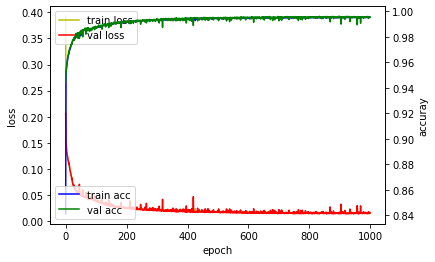

In [32]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(mod.history['loss'], 'y', label='train loss')
loss_ax.plot(mod.history['val_loss'], 'r', label='val loss')

acc_ax.plot(mod.history['accuracy'], 'b', label='train acc')
acc_ax.plot(mod.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [35]:
model.save('./model_final.h5')